In [1]:
pip install xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import ast
import os

In [3]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks


In [5]:
tracks = load("../../fma_metadata/tracks.csv")

In [8]:
features = load("../../fma_metadata/features.csv")

In [316]:
mel_spec= pd.read_csv("mel_spec_feature_all.csv",header=[0,1,2],index_col=0)

In [318]:
mel_spec

feature      mel_spec                                                        \
statistics   kurtosis                                                         
number             01         02         03         04        05         06   
track_id                                                                      
2            6.977288   8.523430  10.831185   6.291095  3.506900   9.120117   
3            1.858794   2.581543   3.302138   0.291598  1.622669   8.322752   
5            2.789147   2.649085   9.505052   3.607185  5.430254  14.675093   
10           5.302786  12.842959   5.520434  10.086315  6.214685   3.545752   
20           4.770732   2.855132   5.129149   2.397881  3.733966   6.913138   
...               ...        ...        ...        ...       ...        ...   
155316       1.307669   1.163447  -0.126194   3.170186  1.659890   0.811660   
155317      17.263535   9.210678   4.442066   7.560443  5.271733   3.083492   
155318       8.301593   7.290366   1.850041   4.098510  7.665234   7.135764   
155319       9.550700   9.153117   1.991114   3.562445  1.297655   1.579687   
155320       1.562233   1.735141   0.191732   3.786871  4.092961   2.875033   

feature                                                 ...            \
statistics                                              ...       std   
number             07         08         09         10  ...        90   
track_id                                                ...             
2           22.781237  11.591305  10.502927   9.928751  ...  0.005500   
3           16.664171  19.515314  17.311966  12.637309  ...  0.014708   
5           22.989956  18.548903  12.525713  11.382951  ...  0.000010   
10           4.271614   6.187099   9.622431  17.836288  ...  0.018939   
20           9.112627   8.455688   4.767415  13.324368  ...  0.008917   
...               ...        ...        ...        ...  ...       ...   
155316       2.170533   8.729316   5.421453   2.946023  ...  0.001007   
155317       4.555440  29.085812  25.266176  10.593042  ...  0.002338   
155318       5.753398  24.139708   5.822393   8.062216  ...  0.003115   
155319       2.070449  10.346556   4.261599   2.609091  ...  0.002461   
155320       3.040477   1.873768   5.516053   2.254966  ...  0.015526   

feature                                                                 \
statistics                                                               
number            91        92        93        94        95        96   
track_id                                                                 
2           0.004066  0.003965  0.002347  0.001663  0.002632  0.001452   
3           0.019320  0.078528  0.072792  0.069122  0.013616  0.008447   
5           0.000009  0.000008  0.000006  0.000005  0.000007  0.000004   
10          0.015547  0.010535  0.006567  0.006368  0.003965  0.003788   
20          0.008339  0.006849  0.006172  0.005579  0.004760  0.004246   
...              ...       ...       ...       ...       ...       ...   
155316      0.000663  0.000429  0.000345  0.000208  0.000123  0.000121   
155317      0.001594  0.001051  0.000818  0.000603  0.000557  0.000391   
155318      0.002223  0.001846  0.001351  0.000899  0.000688  0.000458   
155319      0.001665  0.001135  0.000730  0.000473  0.000313  0.000198   
155320      0.013577  0.011346  0.010214  0.008648  0.007865  0.006310   

feature                                   
statistics                                
number            97        98        99  
track_id                                  
2           0.000114  0.000002  0.000002  
3           0.001303  0.000003  0.000002  
5           0.000002  0.000002  0.000001  
10          0.002343  0.001213  0.000316  
20          0.004115  0.003781  0.003704  
...              ...       ...       ...  
155316      0.000038  0.000002  0.000001  
155317      0.000214  0.000067  0.000098  
155318      0.000194  0.000042  0.000019  
155319      0.000103  0.000006  0.000005  
15532

In [320]:
mel_spec_features = features.merge(mel_spec,left_index=True,right_index=True)

In [322]:
mel_spec_features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
...                ...       ...       ...       ...       ...       ...   
155316       -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317       -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318        0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319       -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   
155320        0.489665  1.862421  0.854461 -0.103666 -0.249835  0.360283   

feature                                             ...  mel_spec            \
statistics                                          ...       std             
number            07        08        09        10  ...        90        91   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.005500  0.004066   
3           1.366848  1.054094  0.108103  0.619185  ...  0.014708  0.019320   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.000010  0.000009   
10          1.770694  1.604566  0.521217  1.982386  ...  0.018939  0.015547   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.008917  0.008339   
...              ...       ...       ...       ...  ...       ...       ...   
155316     -0.237794  5.695442  0.830353  1.951819  ...  0.001007  0.000663   
155317     -0.628103 -0.082687 -0.229483 -0.492753  ...  0.002338  0.001594   
155318      1.713526  1.418444  1.325197  0.120333  ...  0.003115  0.002223   
155319     -0.780860  0.626281 -0.630938 -0.787229  ...  0.002461  0.001665   
155320     -0.366701  0.033578 -0.834606 -1.154845  ...  0.015526  0.013577   

feature                                                                 \
statistics                                                               
number            92        93        94        95        96        97   
track_id                                                                 
2           0.003965  0.002347  0.001663  0.002632  0.001452  0.000114   
3           0.078528  0.072792  0.069122  0.013616  0.008447  0.001303   
5           0.000008  0.000006  0.000005  0.000007  0.000004  0.000002   
10          0.010535  0.006567  0.006368  0.003965  0.003788  0.002343   
20          0.006849  0.006172  0.005579  0.004760  0.004246  0.004115   
...              ...       ...       ...       ...       ...       ...   
155316      0.000429  0.000345  0.000208  0.000123  0.000121  0.000038   
155317      0.001051  0.000818  0.000603  0.000557  0.000391  0.000214   
155318      0.001846  0.001351  0.000899  0.000688  0.000458  0.000194   
155319      0.001135  0.000730  0.000473  0.000313  0.000198  0.000103   
155320      0.011346  0.010214  0.008648  0.007865  0.006310  0.005185   

feature                         
statistics                      
number            98        99  
track_id                        
2           0.000002  0.000002  
3           0.000003  0.000002  
5           0.000002  0.000001  
10          0.001213  0.000316  
20          0.003781  0.003704  
...              ...       ...  
155316      0.000002  0.000001  
155317      0.000067  0.000098  
155318      0.000042  0.000019  
155319      0.000006  0.000005  
155320      0.003995  0.003733  

[106574 rows x 1414 columns]

In [324]:
track_genre = pd.DataFrame(tracks['track','genre_top'])

In [326]:
track_genre.columns = pd.MultiIndex.from_tuples([("","","genre_top")])

In [328]:
track_genre

,
,
,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN
...,...
155316,Rock


In [330]:
selected_track_genres = track_genre[track_genre['','','genre_top'].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [332]:
# selected_track_genres

In [334]:
merged_data = track_genre.merge(mel_spec_features,left_index=True,right_index=True)

In [335]:
merged_data.dropna(inplace=True)

In [336]:
merged_data= merged_data.reset_index().set_index(["track_id",('','','genre_top')])

In [337]:
merged_data.index.rename(["track_id","genre_top"],inplace=True)

In [338]:
merged_data.reset_index(1,inplace=True)

In [344]:
merged_data

genre_top chroma_cens                                          \
                      kurtosis                                           
                            01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...  mel_spec            \
                                                  ...       std             
                06        07        08        09  ...        90        91   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.005500  0.004066   
3         0.067592  1.366848  1.054094  0.108103  ...  0.014708  0.019320   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.000010  0.000009   
10        0.998411  1.770694  1.604566  0.521217  ...  0.018939  0.015547   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.000009  0.000008   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.000922  0.000430   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.001007  0.000663   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.002338  0.001594   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.003115  0.002223   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.002461  0.001665   

                                                                      \
                                                                       
                92        93        94        95        96        97   
track_id                                                               
2         0.003965  0.002347  0.001663  0.002632  0.001452  0.000114   
3         0.078528  0.072792  0.069122  0.013616  0.008447  0.001303   
5         0.000008  0.000006  0.000005  0.000007  0.000004  0.000002   
10        0.010535  0.006567  0.006368  0.003965  0.003788  0.002343   
134       0.000007  0.000009  0.000010  0.000009  0.000003  0.000002   
...            ...       ...       ...       ...       ...       ...   
155315    0.000138  0.000019  0.000003  0.000004  0.000004  0.000003   
155316    0.000429  0.000345  0.000208  0.000123  0.000121  0.000038   
155317    0.001051  0.000818  0.000603  0.000557  0.000391  0.000214   
155318    0.001846  0.001351  0.000899  0.000688  0.000458  0.000194   
155319    0.001135  0.000730  0.000473  0.000313  0.000198  0.000103   

                              
                              
                98        99  
track_id                      
2         0.000002  0.000002  
3         0.000003  0.000002  
5         0.000002  0.000001  
10        0.001213  0.000316  
134       0.000002  0.000001  
...            ...       ...  
155315    0.000003  0.000002  
155316    0.000002  0.000001  
155317    0.000067  0.000098  
155318    0.000042  0.000019  
155319    0.000006  0.000005  

[49594 rows x 1415 columns]

In [347]:
selected_merged_data = merged_data[merged_data["genre_top"].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [349]:
selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_37122/2834995332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)


In [351]:
selected_merged_data['genre_top'].value_counts()

genre_top
Rock          14181
Electronic     9371
Hip-Hop        3552
Folk           2803
Pop            2332
Name: count, dtype: int64

In [353]:
selected_merged_data

genre_top chroma_cens                                          \
                      kurtosis                                           
                            01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...  mel_spec            \
                                                  ...       std             
                06        07        08        09  ...        90        91   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.005500  0.004066   
3         0.067592  1.366848  1.054094  0.108103  ...  0.014708  0.019320   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.000010  0.000009   
10        0.998411  1.770694  1.604566  0.521217  ...  0.018939  0.015547   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.000009  0.000008   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.000922  0.000430   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.001007  0.000663   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.002338  0.001594   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.003115  0.002223   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.002461  0.001665   

                                                                      \
                                                                       
                92        93        94        95        96        97   
track_id                                                               
2         0.003965  0.002347  0.001663  0.002632  0.001452  0.000114   
3         0.078528  0.072792  0.069122  0.013616  0.008447  0.001303   
5         0.000008  0.000006  0.000005  0.000007  0.000004  0.000002   
10        0.010535  0.006567  0.006368  0.003965  0.003788  0.002343   
134       0.000007  0.000009  0.000010  0.000009  0.000003  0.000002   
...            ...       ...       ...       ...       ...       ...   
155315    0.000138  0.000019  0.000003  0.000004  0.000004  0.000003   
155316    0.000429  0.000345  0.000208  0.000123  0.000121  0.000038   
155317    0.001051  0.000818  0.000603  0.000557  0.000391  0.000214   
155318    0.001846  0.001351  0.000899  0.000688  0.000458  0.000194   
155319    0.001135  0.000730  0.000473  0.000313  0.000198  0.000103   

                              
                              
                98        99  
track_id                      
2         0.000002  0.000002  
3         0.000003  0.000002  
5         0.000002  0.000001  
10        0.001213  0.000316  
134       0.000002  0.000001  
...            ...       ...  
155315    0.000003  0.000002  
155316    0.000002  0.000001  
155317    0.000067  0.000098  
155318    0.000042  0.000019  
155319    0.000006  0.000005  

[32239 rows x 1415 columns]

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [357]:
dictG = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [359]:
X = selected_merged_data.drop(["genre_top"],axis=1)
y = selected_merged_data['genre_top'].replace(dictG)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_37122/41724156.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = selected_merged_data.drop(["genre_top"],axis=1)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_37122/41724156.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = selected_merged_data['genre_top'].replace(dictG)


In [361]:
X.shape

(32239, 1414)

In [363]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [365]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_train, y_train = smote.fit_resample(x_train, y_train)
from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Suppose y_train has classes like [0, 1, 2, 3]
# classes = np.unique(y_train)
# class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# print(class_weights)  # one weight for each class

# weights = np.array([class_weights[i] for i in y_train])
import numpy as np
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Now create sample weights
sample_weights = np.array([class_weights[label] for label in y_train])

In [481]:
model = XGBClassifier(subsample= 0.8, reg_alpha=2.0,reg_lambda=2.0, gamma=2.0, n_estimators= 1500,min_child_weight=5, max_depth= 4, learning_rate= 0.02, colsample_bytree= 0.7,eval_metric='mlogloss',use_label_encoder=False, verbosity=1)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [483]:
model.fit(x_train,y_train,sample_weight=sample_weights,eval_set=[(x_train, y_train),(x_val, y_val)],verbose=True,early_stopping_rounds=25)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.59438	validation_1-mlogloss:1.59475
[1]	validation_0-mlogloss:1.57990	validation_1-mlogloss:1.58070
[2]	validation_0-mlogloss:1.56591	validation_1-mlogloss:1.56710
[3]	validation_0-mlogloss:1.55208	validation_1-mlogloss:1.55382
[4]	validation_0-mlogloss:1.53879	validation_1-mlogloss:1.54083
[5]	validation_0-mlogloss:1.52586	validation_1-mlogloss:1.52849
[6]	validation_0-mlogloss:1.51340	validation_1-mlogloss:1.51656
[7]	validation_0-mlogloss:1.50105	validation_1-mlogloss:1.50467
[8]	validation_0-mlogloss:1.48883	validation_1-mlogloss:1.49271
[9]	validation_0-mlogloss:1.47737	validation_1-mlogloss:1.48166
[10]	validation_0-mlogloss:1.46583	validation_1-mlogloss:1.47067
[11]	validation_0-mlogloss:1.45471	validation_1-mlogloss:1.45998
[12]	validation_0-mlogloss:1.44370	validation_1-mlogloss:1.44943
[13]	validation_0-mlogloss:1.43315	validation_1-mlogloss:1.43931
[14]	validation_0-mlogloss:1.42277	validation_1-mlogloss:1.42928
[15]	validation_0-mlogloss:1.41266	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=2.0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [501]:
y_pred_train = model.predict(x_train)

In [502]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9047
           1       0.93      0.94      0.93      6507
           2       0.99      0.82      0.90      1965
           3       0.99      0.92      0.95      2658
           4       0.99      0.83      0.90      2390

    accuracy                           0.93     22567
   macro avg       0.96      0.90      0.92     22567
weighted avg       0.93      0.93      0.93     22567



In [505]:
y_pred_val = model.predict(x_val)

In [507]:
print(classification_report(y_pred_val,y_val))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1962
           1       0.82      0.80      0.81      1448
           2       0.42      0.42      0.42       355
           3       0.78      0.75      0.76       556
           4       0.81      0.64      0.71       515

    accuracy                           0.79      4836
   macro avg       0.73      0.70      0.72      4836
weighted avg       0.79      0.79      0.79      4836



In [509]:
y_pred = model.predict(x_test)

In [511]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2124
           1       0.81      0.82      0.81      1411
           2       0.37      0.40      0.38       356
           3       0.76      0.82      0.79       538
           4       0.63      0.82      0.71       407

    accuracy                           0.79      4836
   macro avg       0.70      0.73      0.71      4836
weighted avg       0.80      0.79      0.79      4836



In [513]:
evals_result = model.evals_result()

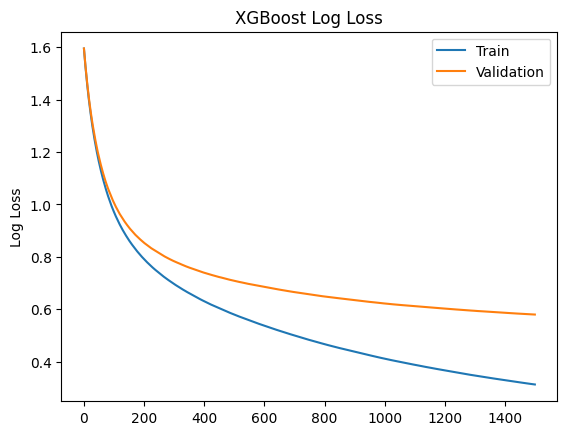

In [515]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

In [534]:
optimized_data_prob = model.predict_proba(X)

In [536]:
optimized_data_prob_final = pd.DataFrame(optimized_data_prob,index=X.index,columns=["Rock","Electronic","Pop","Hip-Hop","Folk"])

In [538]:
optimized_data_prob_final.to_csv("optimized_data_prob_final.csv")

In [523]:
# central_cee_hiphop = pd.read_csv("central_cee_hiphop.csv",index_col=[0],header=[0,1,2])